# Exploratory Data Analysis (EDA) on Trekking Trails Dataset


## 1. Loading and Exploring the Data


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic #For trails near Kathmandu
import folium

file_path = './data/Trekking Trails Dataset - Locations.csv'
df = pd.read_csv(file_path)

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        420 non-null    int64  
 1   Locations    420 non-null    object 
 2   Country      420 non-null    object 
 3   Province     420 non-null    object 
 4   District     418 non-null    object 
 5   Longitude    420 non-null    float64
 6   Latitude     420 non-null    float64
 7   Altitude(m)  419 non-null    object 
 8   Description  0 non-null      float64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.7+ KB


,Index,Locations,Country,Province,District,Longitude,Latitude,Altitude(m),Description
0,1,Aanbu,Nepal,Gandaki,Kaski,84.4257,28.2501,2190,NaN
1,2,Amjilosa,Nepal,Gandaki,Mustang,83.9748,29.3679,3580,NaN
2,3,Ankhe,Nepal,Gandaki,Kaski,84.3371,28.1829,2610,NaN
3,4,Annapurna Base Camp,Nepal,Gandaki,Manang,84.1806,28.5179,4130,NaN
4,5,Arughat,Nepal,Bagmati,Gorkha,84.5434,28.2867,540,NaN


## 2. Data Cleaning


In [32]:
unique_provinces = df['Province'].unique()
# Define the provinces to keep
provinces_to_keep = ['Province 1', 'Province 2', 'Gandaki', 'Bagmati', 'Karnali', 'Lumbini', 'Sudurpaschim']

df = df[df['Province'].isin(provinces_to_keep)]

unique_provinces = df['Province'].unique()
print(unique_provinces)

['Gandaki' 'Bagmati' 'Karnali' 'Province 1' 'Lumbini' 'Province 2']


In [33]:
# Group by province and count the number of trails
trails_per_province = df.groupby('Province').size().sort_values(ascending=False)

# Display the grouped data
print(trails_per_province)

Province
Gandaki       262
Bagmati        41
Karnali        22
Lumbini         2
Province 1      2
Province 2      2
dtype: int64


In [34]:
if 'Description' in df.columns:
    df = df.drop(columns=['Description'])

df['Altitude(m)'] = df['Altitude(m)'].astype(str).str.replace(',', '').str.replace(' m', '').astype(float)

df['District'].fillna('Unknown', inplace=True)
df['Altitude(m)'].fillna(df['Altitude(m)'].median(), inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 0 to 419
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        331 non-null    int64  
 1   Locations    331 non-null    object 
 2   Country      331 non-null    object 
 3   Province     331 non-null    object 
 4   District     331 non-null    object 
 5   Longitude    331 non-null    float64
 6   Latitude     331 non-null    float64
 7   Altitude(m)  331 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 23.3+ KB


C:\Users\samir\AppData\Local\Temp\ipykernel_24296\540791205.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['District'].fillna('Unknown', inplace=True)
C:\Users\samir\AppData\Local\Temp\ipykernel_24296\540791205.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

## 3. Descriptive Statistics


In [35]:
df['Altitude(m)'] = pd.to_numeric(df['Altitude(m)'], errors='coerce')

df.describe()


,Index,Longitude,Latitude,Altitude(m)
count,331.000000,331.000000,331.000000,331.000000
mean,226.746224,84.622925,28.132768,3145.570997
std,124.727177,1.135019,0.360314,1264.796229
min,1.000000,81.092712,26.637800,62.000000
25%,122.500000,84.163900,27.883415,2150.000000
50%,248.000000,84.388069,28.166700,3440.000000
75%,332.500000,84.918700,28.363300,3860.000000
max,420.000000,87.379100,29.378600,6920.000000


## 4. Distribution of Altitudes by Province


C:\Users\samir\AppData\Local\Temp\ipykernel_24296\986050965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Province', y='Altitude(m)', palette='viridis')


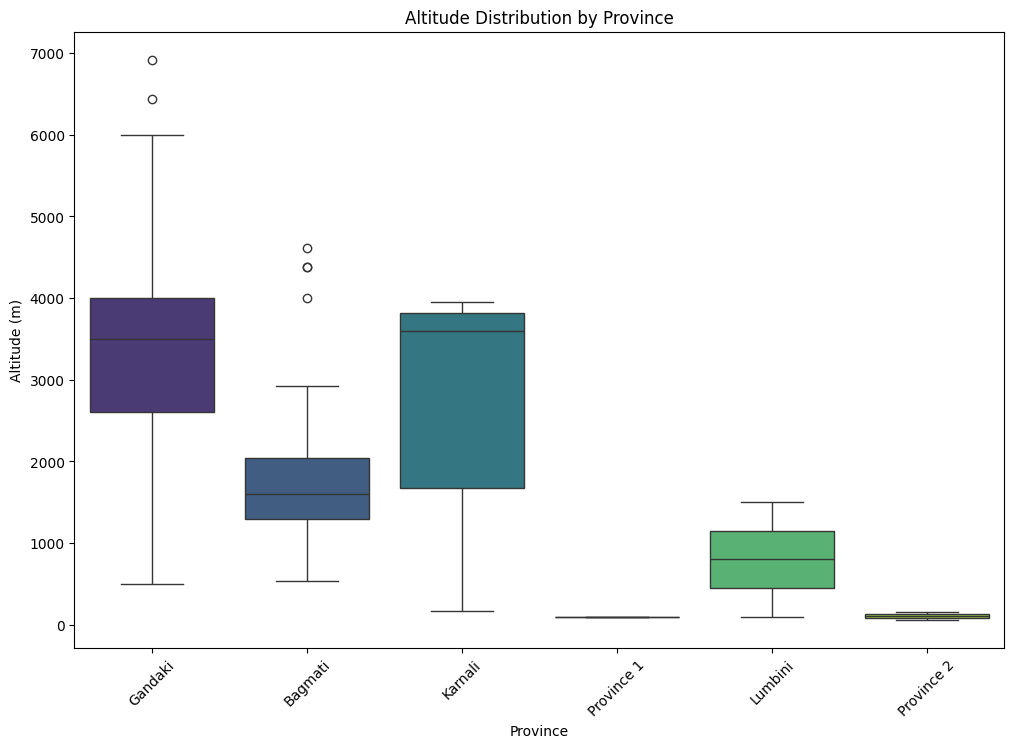

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Province', y='Altitude(m)', palette='viridis')
plt.title('Altitude Distribution by Province')
plt.xlabel('Province')
plt.ylabel('Altitude (m)')
plt.xticks(rotation=45)
plt.savefig('altitude_distribution_by_province.png')
plt.show()


## 5. Average Altitude per Province


Province
Bagmati       1865.804878
Gandaki       3429.564885
Karnali       2914.454545
Lumbini        800.000000
Province 1     100.000000
Province 2     111.000000
Name: Altitude(m), dtype: float64

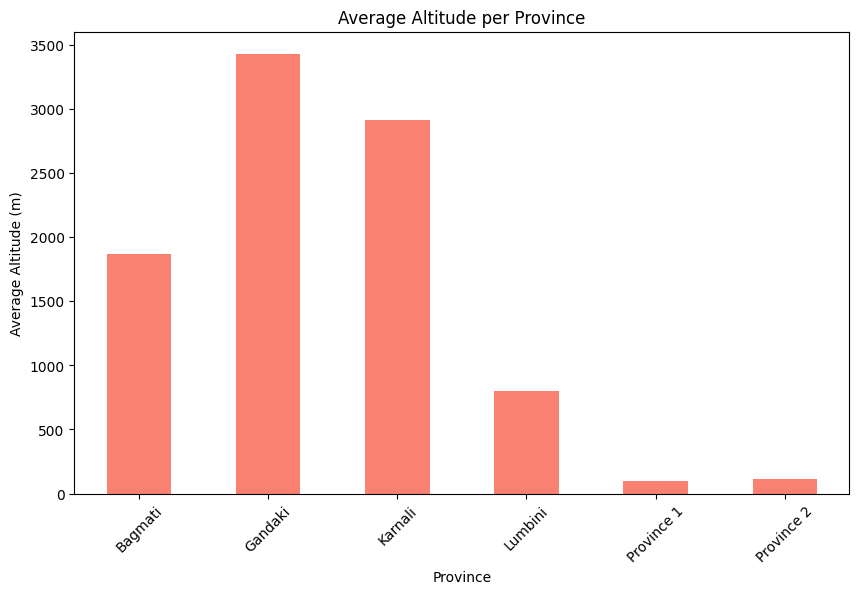

In [48]:
avg_altitude_by_province = df.groupby('Province')['Altitude(m)'].mean()
display(avg_altitude_by_province)

plt.figure(figsize=(10, 6))
avg_altitude_by_province.plot(kind='bar', color='salmon')
plt.title('Average Altitude per Province')
plt.xlabel('Province')
plt.ylabel('Average Altitude (m)')
plt.xticks(rotation=45)
plt.savefig('img/average_altitude_per_province.png')
plt.show()


## 6. Top 5 Provinces by Number of Trails


Province
Gandaki       262
Bagmati        41
Karnali        22
Province 1      2
Lumbini         2
Name: count, dtype: int64

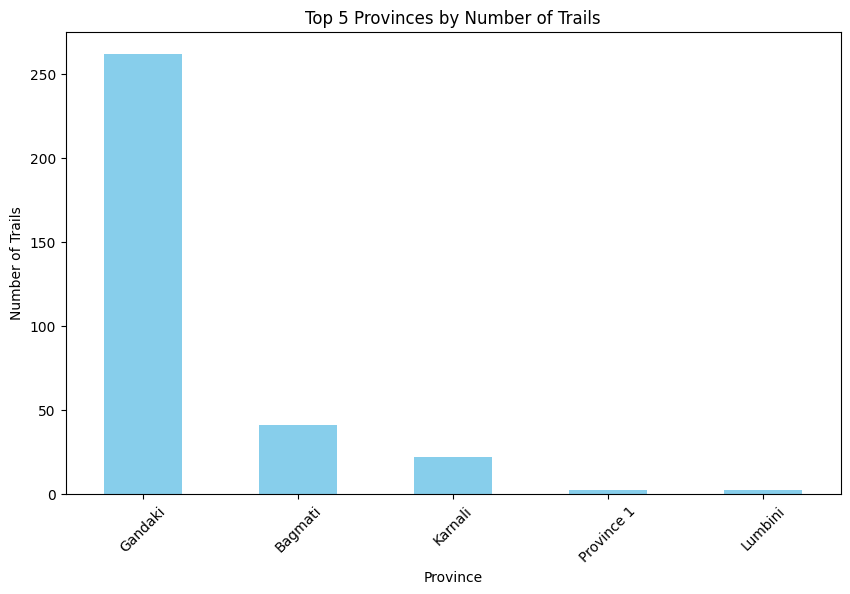

In [47]:
top_provinces = df['Province'].value_counts().head(5)
display(top_provinces)

plt.figure(figsize=(10, 6))
top_provinces.plot(kind='bar', color='skyblue')
plt.title('Top 5 Provinces by Number of Trails')
plt.xlabel('Province')
plt.ylabel('Number of Trails')
plt.xticks(rotation=45)
plt.savefig('img/top_5_provinces_by_number_of_trails.png')
plt.show()


## 7. Top 5 Districts by Average Altitude


District
Solukhumbu    4127.840909
Mustang       4095.000000
Rasuwa        4053.076923
Manang        3838.571429
Dolpa         3723.636364
Name: Altitude(m), dtype: float64

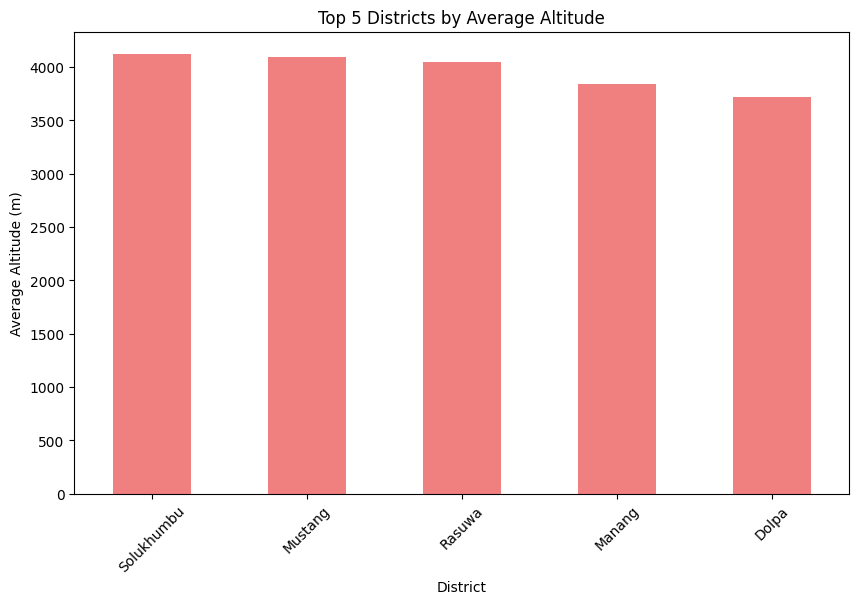

In [46]:
# Calculate and plot the top 5 districts by average altitude
top_districts_by_altitude = df.groupby('District')['Altitude(m)'].mean().nlargest(5)
display(top_districts_by_altitude)

plt.figure(figsize=(10, 6))
top_districts_by_altitude.plot(kind='bar', color='lightcoral')
plt.title('Top 5 Districts by Average Altitude')
plt.xlabel('District')
plt.ylabel('Average Altitude (m)')
plt.xticks(rotation=45)
plt.savefig('img/top_5_districts_by_average_altitude.png')
plt.show()


## 8. Top 5 Highest Altitude Trails


,Altitude(m)
Locations,
Tserko Ri,6920.0
Sagarmatha National Park,6441.0
Yalung Ri Base Camp,6000.0
Kala Pattar,5545.0
Dhampus Pass,5460.0


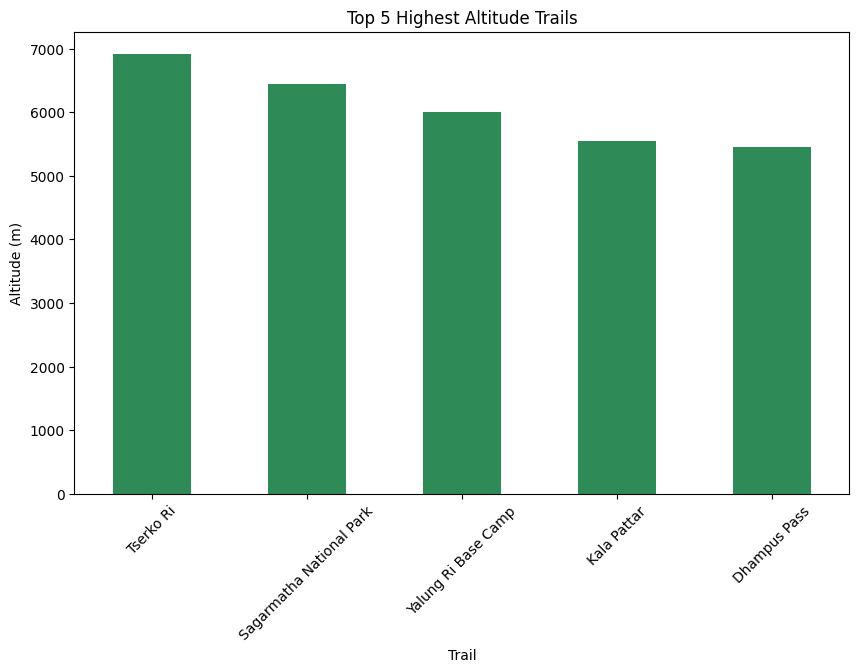

In [51]:
# Sort by altitude and plot the top 5 highest altitude trails
top_trails_by_altitude = df.nlargest(5, 'Altitude(m)')[['Locations', 'Altitude(m)']].set_index('Locations')
display(top_trails_by_altitude)

plt.figure(figsize=(10, 6))
top_trails_by_altitude['Altitude(m)'].plot(kind='bar', color='seagreen')
plt.title('Top 5 Highest Altitude Trails')
plt.xlabel('Trail')
plt.ylabel('Altitude (m)')
plt.xticks(rotation=45)
plt.savefig('img/top_5_highest_altitude_trails.png')
plt.show()


## 9. Top 5 Closest Trails to Kathmandu


In [42]:
kathmandu_coords = (27.7172, 85.3240)

df['Distance_to_Kathmandu_km'] = df.apply(lambda row: geodesic((row['Latitude'], row['Longitude']), kathmandu_coords).km, axis=1)
top_closest_trails = df.nsmallest(5, 'Distance_to_Kathmandu_km')[['Locations', 'Distance_to_Kathmandu_km']]
top_closest_trails.set_index('Locations')


,Distance_to_Kathmandu_km
Locations,
Barkhor Bazaar,0.000000
Naubise,0.454798
Chandragiri,0.808102
Gaura,0.808102
Banthati,0.918817


## 10. Altitude Distribution by Trekking Trail Category


C:\Users\samir\AppData\Local\Temp\ipykernel_24296\3315112454.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Altitude_Category', palette='Set2')


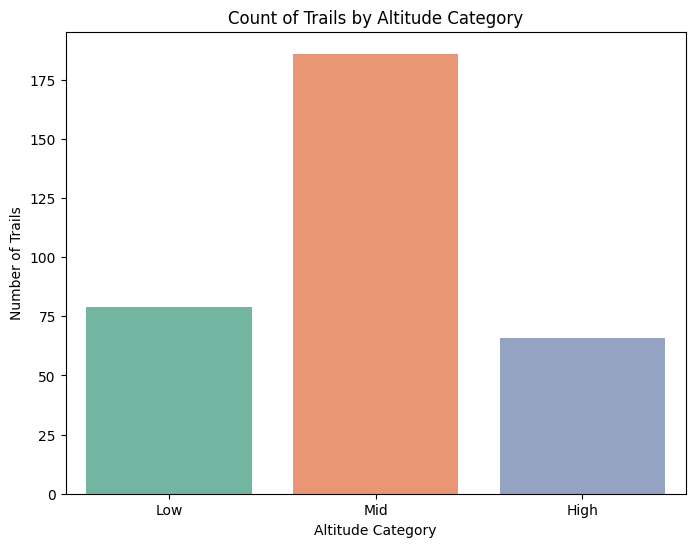

In [44]:
df['Altitude_Category'] = pd.cut(df['Altitude(m)'], bins=[0, 2000, 4000, df['Altitude(m)'].max()], labels=['Low', 'Mid', 'High'])

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Altitude_Category', palette='Set2')
plt.title('Count of Trails by Altitude Category')
plt.xlabel('Altitude Category')
plt.ylabel('Number of Trails')
plt.savefig('img/count_of_trails_by_altitude_category.png')
plt.show()


## 11. Correlation Analysis Between Altitude and Latitude/Longitude


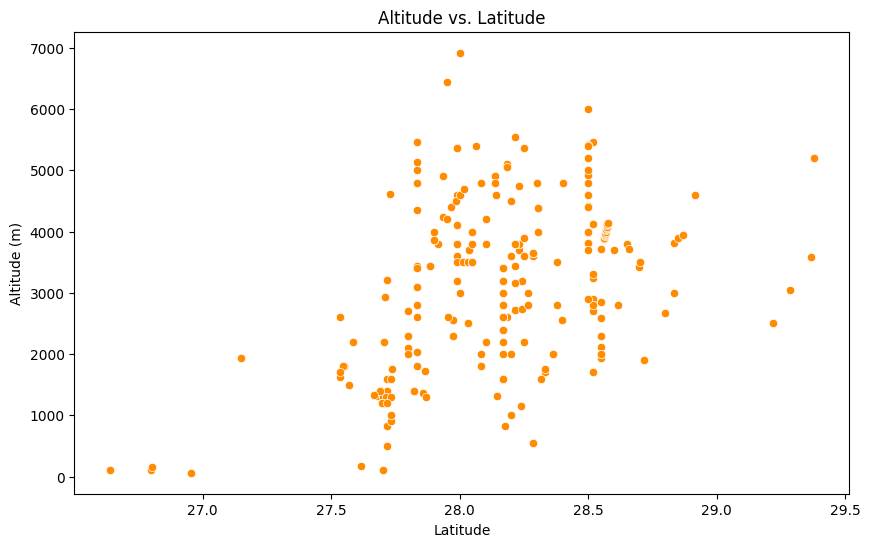

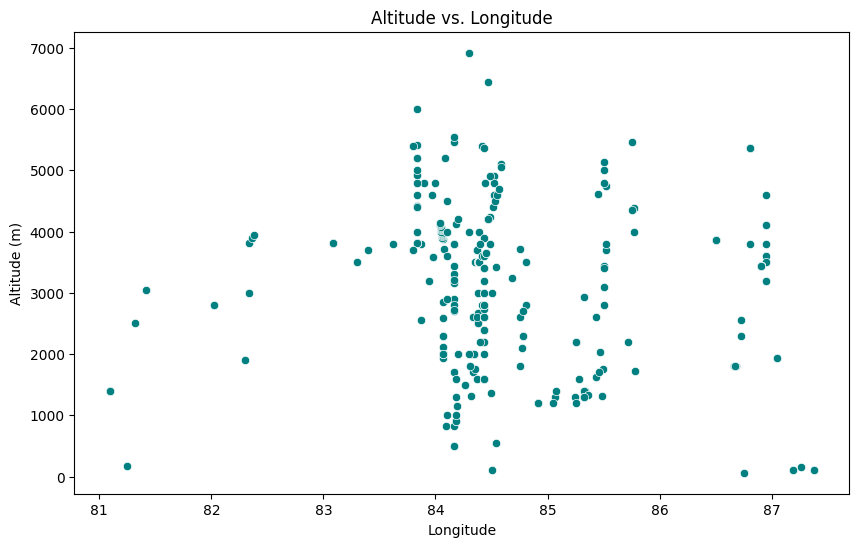

In [53]:
# Altitude vs. Latitude
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Latitude', y='Altitude(m)', color='darkorange')
plt.title('Altitude vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Altitude (m)')
plt.savefig('img/correlation_latitude_altitude')
plt.show()

# Altitude vs. Longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Longitude', y='Altitude(m)', color='teal')
plt.title('Altitude vs. Longitude')
plt.xlabel('Longitude')
plt.ylabel('Altitude (m)')
plt.savefig('img/correlation_longitude_altitude')
plt.show()



### Conclusions:


1. *Gandaki province seems to have more trails with higher altitude, also found some outliers there*
2. *Generally, Gandaki Province have trails with higher altitude, followed by Karnali and Bagmati*
3. *Gandaki Province has the highest number of trails followed By Bagmati. shockingly aobut 200 trails of gap between Gandaki and Bagmati*
4. *District Solukhumbu has the highest average altitude followed by mustang, rasuwa and manang, suggesting it is suited for high-altitude trekkers*
5. *Found: Tserko Ri- 6920m the highest trail followed by Sagarmatha National Park -6441m*
6. *Found Nearest trails from Kathmandu*
